# LangChain Applications: A Chatbot Built with `create_agent`

## 1. Setup

In [1]:
# Import required modules
import uuid  # For generating UUIDs (random IDs)
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver  # For saving memory
from IPython.display import Image, display

# Load environment variables
load_dotenv()

# Model name
MODEL_NAME = "gpt-5-mini"


## 2. Create the agent

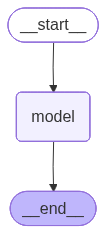

In [2]:
# Initialize the model
model = ChatOpenAI(model=MODEL_NAME)

# Initialize the checkpointer (memory store)
checkpointer = InMemorySaver()

# Create the agent (no tools = a pure chatbot)
agent = create_agent(
    model=model,
    tools=[],  # Tools list is empty
    checkpointer=checkpointer,
    system_prompt="Answer the user's questions concisely. Do not include unnecessary words."
)

# Visualize the graph
display(Image(agent.get_graph().draw_mermaid_png()))


## 3. Main loop

In [3]:
# Generate a random UUID and set it as thread_id
# This resets the memory each time you run the script
config = {"configurable": {"thread_id": str(uuid.uuid4())}}

while True:
    # Receive a question from the user
    user_input = input("Enter a message: ")
    # Exit if no question is entered
    if user_input.strip() == "":
        break
    print(f"Question: {user_input}")

    # Run the agent and stream the response
    for chunk, metadata in agent.stream(
        {"messages": [{"role": "user", "content": user_input}]},
        config=config,
        stream_mode="messages"
    ):
        if chunk.content:
            print(chunk.content, end="", flush=True)
    print()  # New line
            
print("\n---Thank you for using this! ---")


Question: What lunch do you recommend?
Do you have any dietary restrictions, time limit, or whether you want to cook or order? 

Quick suggestions (with cook time/order option):
- Grilled chicken salad — mixed greens, cherry tomatoes, cucumber, avocado, lemon‑olive oil vinaigrette (15–20 min).  
- Turkey‑avocado wrap — deli turkey, spinach, hummus or mustard, whole‑wheat tortilla (5–10 min).  
- Mediterranean chickpea bowl — chickpeas, cucumber, tomato, olives, feta, tzatziki or olive oil + lemon (no‑cook/5–10 min).  
- Pesto pasta with cherry tomatoes and mozzarella — quick, comforting (15–20 min).  
- Miso soup + rice + steamed vegetables + tofu or salmon — light and warming (15–20 min).  
- Tuna melt or open‑face tuna avocado toast — fast and satisfying (10–12 min).  

Tell me your preferences and time and I’ll pick one and give a short recipe or ordering suggestion.
Question: The first one.
Great — here’s a quick grilled chicken salad recipe (serves 2).

Ingredients
- 2 boneless sk